# Characterize snow cover time series

In [1]:
# Install packages not in the default Colab environment
# !pip install rioxarray

In [2]:
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sys
import numpy as np

In [3]:
# If using Google Colab, mount Google Drive to access files
# from google.colab import drive
# drive.mount('/content/drive')

## Define paths and settings

In [5]:
# define path to study-sites/
# study_sites_path = '/content/drive/MyDrive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites'
study_sites_path = '/Volumes/LaCie/raineyaberle/Research/PhD/snow_cover_mapping/study-sites/'

# define path to snow-cover-mapping-application/
base_path = '/Users/raineyaberle/Research/PhD/snow_cover_mapping/snow-cover-mapping-application'

# determine whether to save figures to file
save_figures = False

# path to save output figures
figures_out_path = os.path.join(base_path, 'figures')

# Load necessary functions
sys.path.insert(1, os.path.join(base_path, 'functions'))
import model_analyze_utils as f

## Load compiled snowlines and AOIs

In [7]:
snowlines_fn = os.path.join(study_sites_path, '..', 'all_snowlines', 'all_snowlines.csv')
snowlines = pd.read_csv(snowlines_fn)
snowlines['datetime'] = pd.to_datetime(snowlines['datetime'], format='mixed')

aois_fn = os.path.join(study_sites_path, '..', 'al_AOIs', 'all_AOIs.shp')
aois = gpd.read_file(aois_fn)

## Extract subregions

In [8]:
data_df[['O1Region', 'O2Region']] = data_df[['O1Region', 'O2Region']].astype(float)
data_df = data_df.sort_values(by=['O1Region', 'O2Region', 'site_name', 'Date']).reset_index(drop=True)
unique_subregion_counts = data_df[['O1Region', 'O2Region']].value_counts().reset_index(name='count')
unique_subregion_counts = unique_subregion_counts.sort_values(by=['O1Region', 'O2Region']).reset_index(drop=True)
# grab unique subregions
unique_subregions = unique_subregion_counts[['O1Region', 'O2Region']].values
unique_subregion_counts

,O1Region,O2Region,count
0,1.0,2.0,6869
1,1.0,3.0,4704
2,1.0,4.0,4991
3,1.0,5.0,6881
4,1.0,6.0,6083
5,2.0,1.0,2942
6,2.0,2.0,6605
7,2.0,3.0,3882
8,2.0,4.0,4449
9,2.0,5.0,2408


## Calculate and plot median time series for each subregion

Alaska Range
Aleutians
W. Chugach Mtns.
St. Elias Mtns.
N. Coast Ranges
N. Rockies
N. Cascades
C. Rockies
S. Cascades
S. Rockies


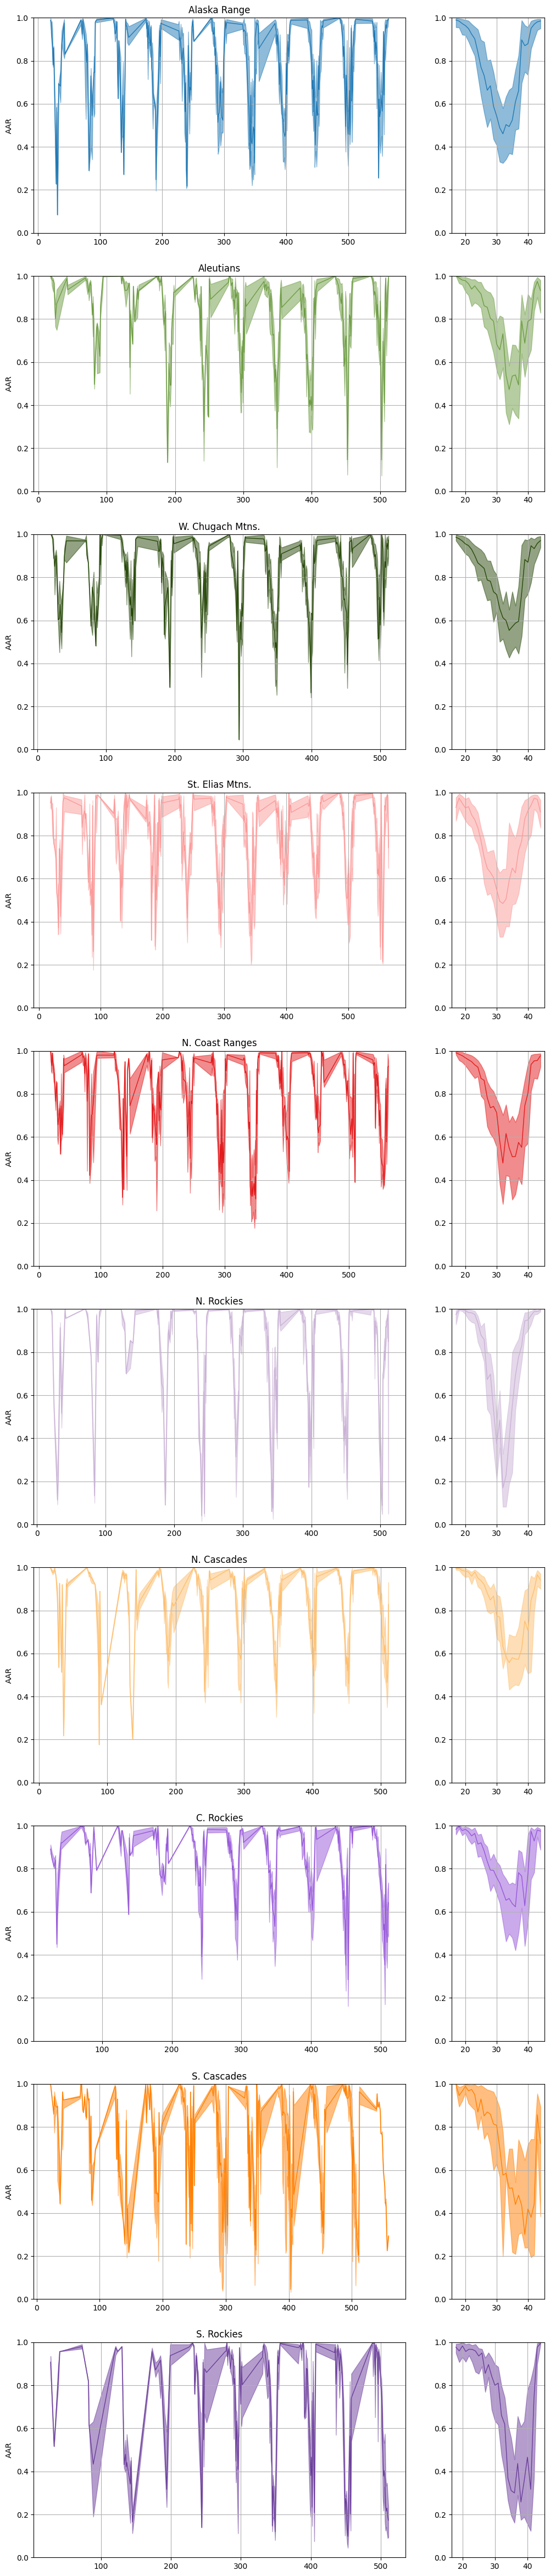

In [48]:
# # Set up figure
# fig, ax = plt.subplots(len(unique_subregions), 2,
#                        gridspec_kw={'width_ratios': [4, 1]},
#                        figsize=(12, 6*len(unique_subregions)))
# linewidth = 1
# alpha = 0.5

# # Add column to data for week of year (WOY)
# data_df.index = data_df['Date']
# data_df['WOY'] = pd.Index(data_df.index.isocalendar().week)

# # Add column to data for weeks since 2013-01-01
# data_df['Week'] = ((data_df['Date'] - np.datetime64('2013-01-01')) / np.timedelta64(1, 'W')).astype(int).values

# # Iterate over subregions
# for i, (o1region, o2region) in enumerate(unique_subregions):

#     # determine name of subregion
#     subregion_name, color = f.determine_subregion_name_color(o1region, o2region)
#     print(subregion_name)

#     # subset data to sites in subregion
#     data_subregion_df = data_df.loc[(data_df['O1Region']==o1region) & (data_df['O2Region']==o2region)]

#     # calculate median and IQR trends in AAR for weeks since 2013
#     q1, q3 = 0.25, 0.75
#     # calculate weekly median trend
#     weekly = data_subregion_df.groupby(data_subregion_df['Week'])['AAR'].agg(['median', lambda x: x.quantile(q1), lambda x: x.quantile(q3)])
#     weekly.columns = ['Median', 'Q1', 'Q3']  # Rename the columns for clarity
#     # plot
#     ax[i,0].fill_between(weekly.index, weekly['Q1'], weekly['Q3'], color=color, alpha=alpha)
#     ax[i,0].plot(weekly.index, weekly['Median'], color=color, linewidth=linewidth, label=subregion_name)
#     ax[i,0].set_ylim(0,1)
#     ax[i,0].grid(True)
#     ax[i,0].set_title(subregion_name)
#     ax[i,0].set_ylabel('AAR')

#     # calculate median and IQR trends in AAR for WOY
#     q1, q3 = 0.25, 0.75
#     # calculate weekly median trend
#     weekly = data_subregion_df.groupby(data_subregion_df['WOY'])['AAR'].agg(['median', lambda x: x.quantile(q1), lambda x: x.quantile(q3)])
#     weekly.columns = ['Median', 'Q1', 'Q3']  # Rename the columns for clarity
#     # plot
#     ax[i,1].fill_between(weekly.index.values.astype(float), weekly['Q1'], weekly['Q3'], color=color, alpha=alpha)
#     ax[i,1].plot(weekly.index, weekly['Median'], color=color, linewidth=linewidth, label=subregion_name)
#     ax[i,1].set_ylim(0,1)
#     ax[i,1].grid(True)

# plt.show()


In [99]:
# # Add column to data for week of year (WOY)
# data_df.index = data_df['Date']
# data_df['WOY'] = pd.Index(data_df.index.isocalendar().week)

# # Add column to data for weeks since 2013-01-01
# data_df['Week'] = ((data_df['Date'] - np.datetime64('2013-01-01')) / np.timedelta64(1, 'W')).astype(int).values

# columns = ['AAR', 'ELA_from_AAR_m', 'Cumulative_Positive_Degree_Days', 'Cumulative_Snowfall_mwe']
# q1, q3 = 0.25, 0.75

# # Group by multiple columns and apply median, Q1, and Q3 for all columns
# agg_functions = {col: ['median', lambda x: x.quantile(q1), lambda x: x.quantile(q3)] for col in data_df.columns if col in columns}

# weekly_trends_df = data_df.groupby(['O1Region', 'O2Region', 'WOY']).agg(agg_functions).reset_index()

# # Flatten and adjust columns
# weekly_trends_df.columns = [' '.join(col).strip() for col in weekly_trends_df.columns.values]
# weekly_trends_df.columns = [col.replace('<lambda_0>', 'Q1').replace('<lambda_1>', 'Q3') for col in weekly_trends_df.columns.values]

# # Save dataframe to file as CSV
# weekly_trends_fn = os.path.join(base_path, 'inputs-outputs', 'weekly_trends_fn')
# weekly_trends_df.to_csv(weekly_trends_fn, index=False)
# print('DataFrame saved to file: ' + weekly_trends_fn)

DataFrame saved to file: /content/drive/MyDrive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/inputs-outputs/weekly_trends_fn
